## *Importing the libraries*

In [1]:
import numpy as np
from array import *
import copy
import random
import pandas as pd
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from skimage import io
import os
import shutil
tf.__version__

'2.7.0'

## *Loading the CIFAR10 dataset*

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
np.shape(X_train), np.shape(Y_train), np.shape(X_test), np.shape(Y_test)

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

## *Data Visualization*

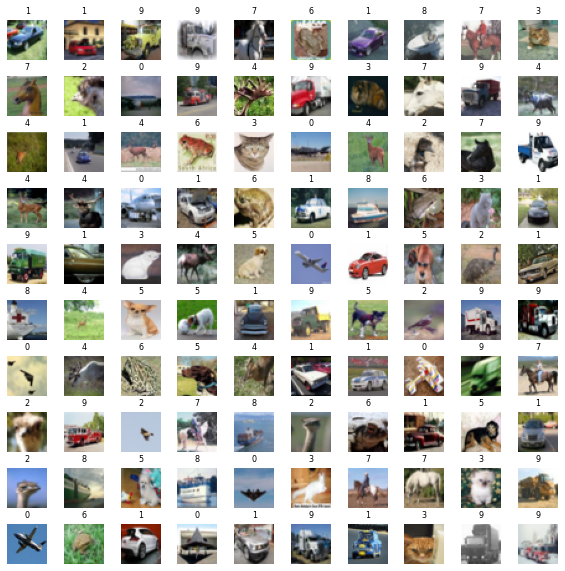

In [4]:
l_grid = 10
w_grid = 10
fig, axes = plt.subplots(l_grid, w_grid, figsize = (10, 10))
axes = axes.ravel()
for i in range(0, l_grid*w_grid):
  j = np.random.randint(0, len(X_train))
  axes[i].imshow(X_train[j])
  axes[i].set_title(Y_train[j][0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

## *Data Pre-processing*

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
from sklearn.preprocessing import OneHotEncoder
encoding = OneHotEncoder()
Y_train = encoding.fit_transform(Y_train).toarray()
Y_test = encoding.fit_transform(Y_test).toarray()

In [7]:
np.shape(X_train), np.shape(Y_train), np.shape(X_test), np.shape(Y_test)

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [8]:
x_train = np.reshape(X_train, (X_train.shape[0], 32*32*3))
x_test = np.reshape(X_test, (X_test.shape[0], 32*32*3))

In [9]:
np.shape(x_train), np.shape(x_test)

((50000, 3072), (10000, 3072))

## *Model Building and Model Training*

#### NET A

In [10]:
def NetA():
  classifier = tf.keras.models.Sequential()
  classifier.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
  return classifier

In [11]:
NetA = NetA()
NetA.build((None,x_train.shape[1]))
NetA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [12]:
NetA.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
epoch_history1 = NetA.fit(x_train, Y_train, batch_size = 32, validation_split = 0.15, epochs = 50)

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.9654 - accuracy: 0.3143 - val_loss: 1.9275 - val_accuracy: 0.3336
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8858 - accuracy: 0.3519 - val_loss: 2.0114 - val_accuracy: 0.3268
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8671 - accuracy: 0.3599 - val_loss: 1.9659 - val_accuracy: 0.3279
Epoch 4/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8336 - accuracy: 0.3704 - val_loss: 1.8705 - val_accuracy: 0.3548
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8265 - accuracy: 0.3753 - val_loss: 1.9987 - val_accuracy: 0.3183
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8221 - accuracy: 0.3762 - val_loss: 1.7998 - val_accuracy: 0.3725
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.8174 - accuracy: 0.3786 - val_loss: 2.0345 - val_accuracy:

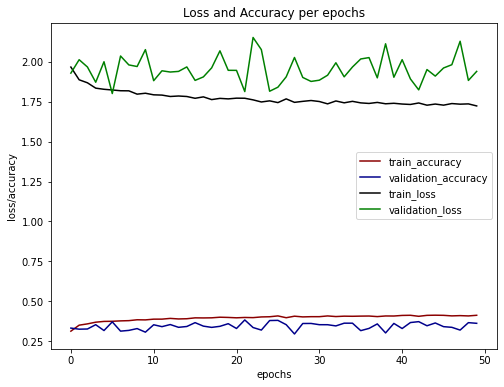

In [14]:
plt.figure(figsize = (8, 6))

plt.plot(epoch_history1.history['accuracy'], c = 'darkred', label="train_accuracy")
plt.plot(epoch_history1.history['val_accuracy'], c = 'darkblue', label = 'validation_accuracy')

plt.plot(epoch_history1.history['loss'], c = 'black', label = 'train_loss')
plt.plot(epoch_history1.history['val_loss'], c = 'green', label = 'validation_loss')

plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.title('Loss and Accuracy per epochs')
plt.legend(loc = 'center right')
plt.show()

#### NET B

In [15]:
def NetB():
  classifier = tf.keras.models.Sequential()
  classifier.add(tf.keras.layers.Dense(units = 300))
  classifier.add(tf.keras.layers.Activation('relu'))
  classifier.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
  return classifier

NetB = NetB()
NetB.build((None,x_train.shape[1]))
NetB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 300)               921900    
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


In [16]:
NetB.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
epoch_history2 = NetB.fit(x_train, Y_train, batch_size = 32, validation_split = 0.15, epochs = 50)

Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.9300 - accuracy: 0.3073 - val_loss: 1.7975 - val_accuracy: 0.3585
Epoch 2/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.7653 - accuracy: 0.3724 - val_loss: 1.7446 - val_accuracy: 0.3788
Epoch 3/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.7053 - accuracy: 0.3962 - val_loss: 1.7010 - val_accuracy: 0.3917
Epoch 4/50
1329/1329 [==============================] - 6s 5ms/step - loss: 1.6620 - accuracy: 0.4132 - val_loss: 1.6541 - val_accuracy: 0.4167
Epoch 5/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.6345 - accuracy: 0.4210 - val_loss: 1.6901 - val_accuracy: 0.3979
Epoch 6/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.6080 - accuracy: 0.4276 - val_loss: 1.6383 - val_accuracy: 0.4207
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5935 - accuracy: 0.4332 - val_loss: 1.6427 - val_accuracy:

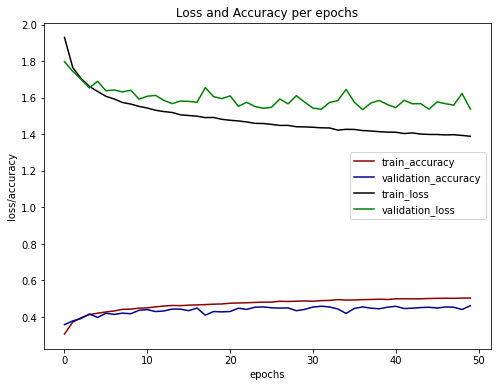

In [18]:
plt.figure(figsize = (8, 6))

plt.plot(epoch_history2.history['accuracy'], c = 'darkred', label="train_accuracy")
plt.plot(epoch_history2.history['val_accuracy'], c = 'darkblue', label = 'validation_accuracy')

plt.plot(epoch_history2.history['loss'], c = 'black', label = 'train_loss')
plt.plot(epoch_history2.history['val_loss'], c = 'green', label = 'validation_loss')

plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.title('Loss and Accuracy per epochs')
plt.legend(loc = 'center right')
plt.show()

#### NET C

In [19]:
input_shape = (32, 32, 3)
X_input = tf.keras.Input(input_shape)
X = tf.keras.layers.Conv2D(filters = 25, kernel_size = (5, 5))(X_input)
X = tf.keras.layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2))(X)
X = tf.keras.layers.Activation('relu')(X)
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(units = 10, activation = 'softmax')(X)
NetC = tf.keras.models.Model(inputs = X_input, outputs = X)
NetC.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 25)        1900      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 activation_1 (Activation)   (None, 13, 13, 25)        0         
                                                                 
 flatten (Flatten)           (None, 4225)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                42260     
                                                             

In [20]:
NetC.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
epoch_history3 = NetC.fit(X_train, Y_train, batch_size = 32, validation_split = 0.15, epochs = 50)

Epoch 1/50
1329/1329 [==============================] - 9s 6ms/step - loss: 1.5062 - accuracy: 0.4676 - val_loss: 1.3761 - val_accuracy: 0.5224
Epoch 2/50
1329/1329 [==============================] - 7s 6ms/step - loss: 1.2612 - accuracy: 0.5610 - val_loss: 1.2891 - val_accuracy: 0.5560
Epoch 3/50
1329/1329 [==============================] - 7s 6ms/step - loss: 1.1685 - accuracy: 0.5954 - val_loss: 1.1726 - val_accuracy: 0.5992
Epoch 4/50
1329/1329 [==============================] - 7s 6ms/step - loss: 1.1052 - accuracy: 0.6200 - val_loss: 1.1688 - val_accuracy: 0.5965
Epoch 5/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.0540 - accuracy: 0.6377 - val_loss: 1.1230 - val_accuracy: 0.6153
Epoch 6/50
1329/1329 [==============================] - 7s 5ms/step - loss: 1.0221 - accuracy: 0.6498 - val_loss: 1.1267 - val_accuracy: 0.6184
Epoch 7/50
1329/1329 [==============================] - 7s 5ms/step - loss: 0.9961 - accuracy: 0.6596 - val_loss: 1.1523 - val_accuracy:

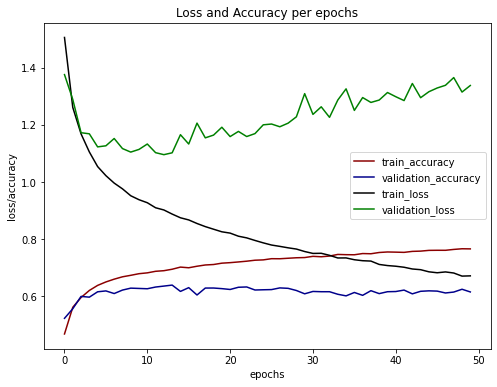

In [22]:
plt.figure(figsize = (8, 6))

plt.plot(epoch_history3.history['accuracy'], c = 'darkred', label="train_accuracy")
plt.plot(epoch_history3.history['val_accuracy'], c = 'darkblue', label = 'validation_accuracy')

plt.plot(epoch_history3.history['loss'], c = 'black', label = 'train_loss')
plt.plot(epoch_history3.history['val_loss'], c = 'green', label = 'validation_loss')

plt.xlabel('epochs')
plt.ylabel('loss/accuracy')
plt.title('Loss and Accuracy per epochs')
plt.legend(loc = 'center right')
plt.show()

## *Classification Accuracy*

In [23]:
_, accuracy1 = NetA.evaluate(x_test, Y_test)
_, accuracy2 = NetB.evaluate(x_test, Y_test)
_, accuracy3 = NetC.evaluate(X_test, Y_test)
accuracy_history = {u'NetA': accuracy1, u'NetB' : accuracy2, u'NetC' : accuracy3}

313/313 [==============================] - 1s 4ms/step - loss: 1.3497 - accuracy: 0.5980


## *Visualization of Predictive Accuracy*

{'NetA': 0.36390000581741333, 'NetB': 0.4677000045776367, 'NetC': 0.5979999899864197}


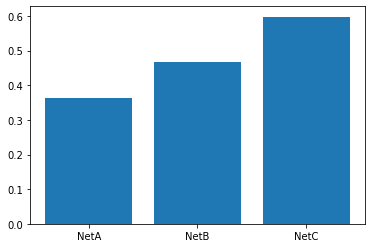

In [24]:
print(accuracy_history)
plt.bar(*zip(*accuracy_history.items()))
plt.show()